In [1]:
%pylab
%matplotlib inline
import numpy as np
import math
import pandas as pd
import seaborn as sns

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
# activation functions 
def function_relu(H):
    return np.tanh(H)
    
def function_linear(H):
    return H


In [16]:
def BN_recurrence(H,W,N,d): # recurrence of batchnorm
    H_half = W @ H
    mean_H = np.mean(H_half,axis=1)
    mean_H = mean_H.reshape(d,1)
    mean_H = mean_H.repeat(N,axis=1)
    H_half = H_half-mean_H
    M = H_half @ H_half.T/N 
    diag_M = np.diag(1./np.sqrt(np.diag(M))) 
    return F(diag_M @H_half)
def compute_rank(H,epsilon = 0.5*pow(10,0)):
    return np.linalg.matrix_rank(H)
    #u,s,v = np.linalg.svd(H)
    #return sum(s>epsilon)
    
def compute_singular_values(H):
    s = np.linalg.svd(H,full_matrices=False, compute_uv=False)
    return s

In [17]:
def run_experiment(F):
    d = 32
    N = d 
    num_layer = 50000
    layers = []
    rank_H = []
    rank_H_BN = []
    run_id=[]
    no_runs=1
    for i in range(no_runs):
        svs=[]
        X = np.random.randn(d,N)
        H = X # pre-activations of BN network
        H_hat = X # pre-activations of Linear network
        for l in range(num_layer): 
            W = 2*math.sqrt(3)*(np.random.rand(d,d)-.5)
            #W =  np.random.randn(d,d)
            H_hat = W @ F(H_hat)
            H_hat = H_hat/np.linalg.norm(H_hat)
            H = BN_recurrence(H,W,N,d)
            if l % 1000 == 0: 
                layers.append(l)
                rank_H_BN.append(compute_rank(H))
                rank_H.append(compute_rank(H_hat)) 
                run_id.append(i)
            if l % 10000 == 0:
                svs.append(compute_singular_values(H))
        print(i)
            
    run_dic={'id':run_id,'step':layers,'rank':rank_H}
    run_dic_BN={'id':run_id,'step':layers,'rank':rank_H_BN}
    run_pd=pd.DataFrame(run_dic)
    run_pd_BN=pd.DataFrame(run_dic_BN)

    return run_pd, run_pd_BN, svs

In [18]:
#F = function_relu
F = function_linear 
run_pd,run_pd_BN,svs=run_experiment(F)


0


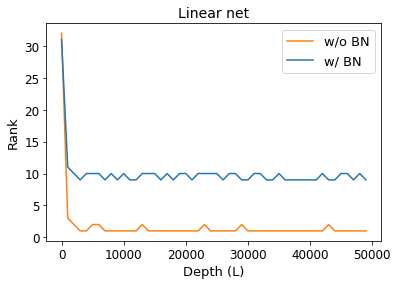

In [19]:
fig=plt.figure()
sns.lineplot(x='step',y='rank',data=run_pd,label='w/o BN',color=sns.color_palette()[1])
ax=sns.lineplot(x='step',y='rank',data=run_pd_BN,label='w/ BN',color=sns.color_palette()[0])
plt.xlabel("Depth (L)",fontsize=13)
plt.ylabel("Rank",fontsize=13)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


plt.legend(fontsize=13)
if F==function_linear:
    plt.title('Linear net',fontsize=14)
    #fig.savefig('fig_2_linear.pdf', bbox_inches='tight')
else:
    plt.title('Relu net',fontsize=14)
    #fig.savefig('fig_2_relu.pdf', bbox_inches='tight')


